In [32]:
import numpy as np
import pandas as pd
import gurobipy as gp

# Q1
Max is in a pie eating contest that lasts 1 hour. Each torte that he eats takes 2 minutes to eat. Each apple pie that he eats takes 3 minutes. He receives 4 points for each torte and 5 points for each pie. Find the number of tortes and apple pies Max should eat to get the most points. Solve the problem using the graphical method.

Next, let’s see what happens if he would like to stick to his preference of eating at least as many pies as tortes. That is; the number of pies he eats should be greater than or equal to the number of tortes.

 

By how many points does this constraint decrease Max’s total points? (this is the part you will submit to the canvas answer.)

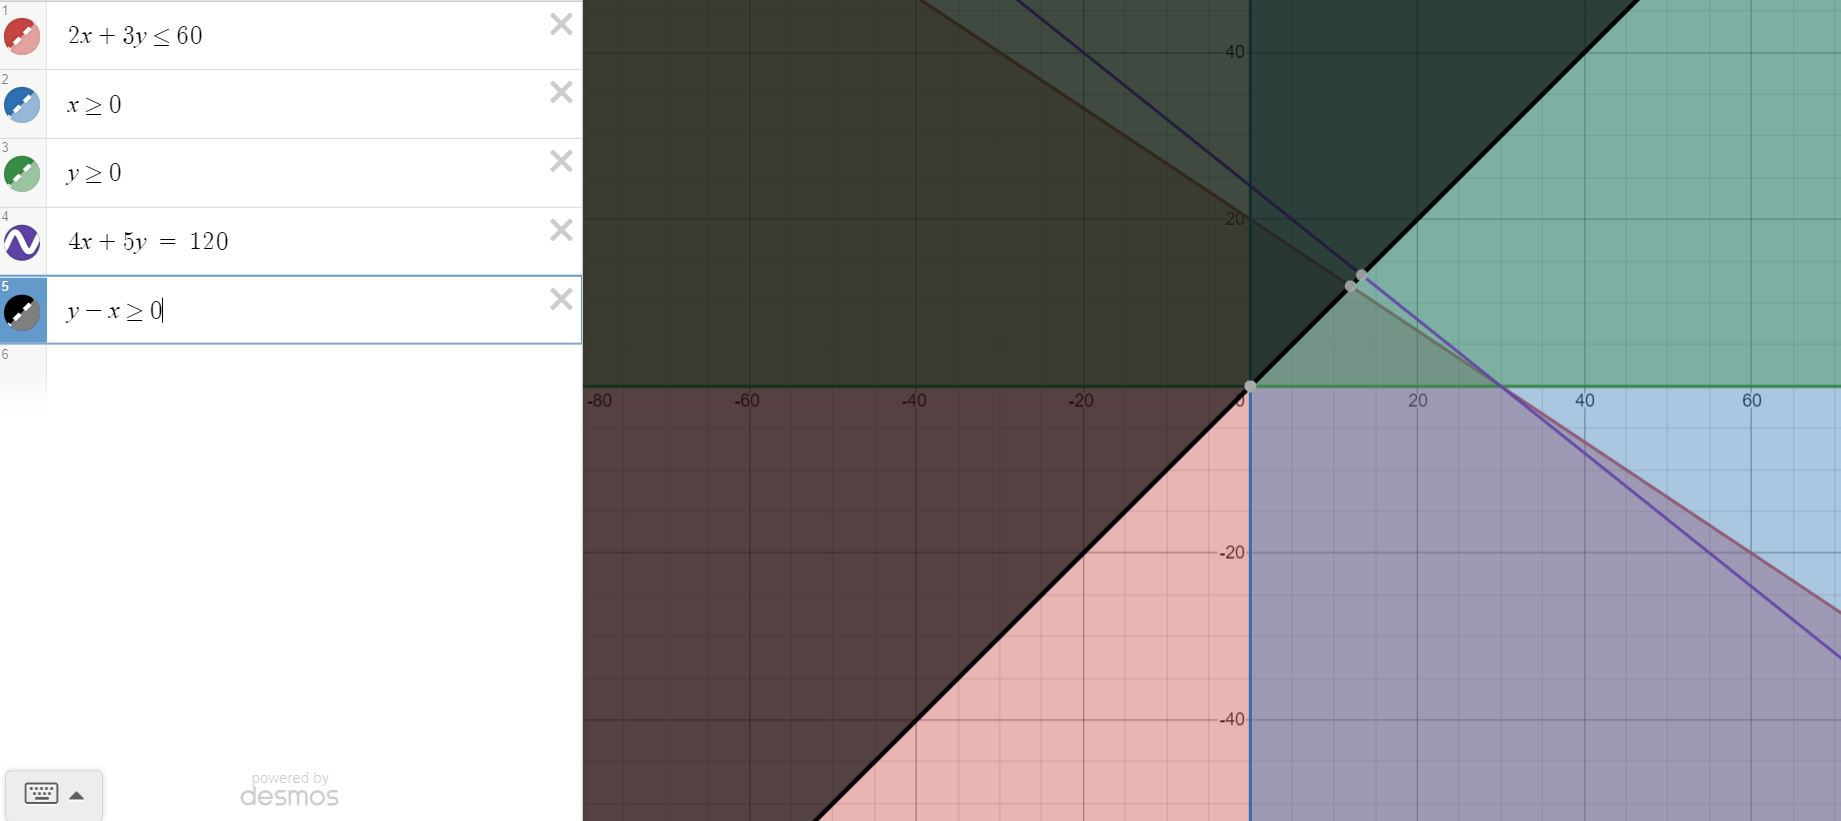

To get maximum points, he should eat 30 tortes and no pies. The points received will then be 120. But when he has to eat as many pies as tortes atleast, he shlould eat 12 of both pies and tortes, getting a total of 108 points. So finally, this reduces 12 points for him.

# Q2
A farmer in Iowa owns 450 acres of land. He is going to plant each acre with wheat or corn. Each acre planted with wheat (corn) yields $2,000 ($3,000) profit, requires three (two) workers, and requires two (four) tons of fertilizer. There are currently 1,000 workers and 1,200 tons of fertilizer available.

 

Formulate and solve this problem using gurobi.

 

Next we want to see What happens to the decision variables and the total profit when the availability of fertilizer varies from 200 tons to 2200 tons in 100-ton increments.

 

At what level of fertilizer does the farmer discontinue producing wheat?  That is, what is the smallest level of available fertilizer that results in no wheat being produced?  Your answer should be one of the 100 ton incremental numbers, like 600 or 1300 or...

In [19]:
#initializing objective functions and constraints
obj = np.array([2000,3000]) # maximize profits
A = np.zeros((3,2)) # initialize constraint matrix
A[0,:] = [2,4] # fertilizer constraint
A[1,:] = [3,2] # manpower constraint
A[2,:] = [1,1] # land constraint
b = np.array([1200,1000,450]) # limits on production, storage, and demand
sense = np.array(['<','<','<']) # all constraints are less than or equal constraints

print(A)

[[2. 4.]
 [3. 2.]
 [1. 1.]]


In [22]:
#solving with the model
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(2) # tell the model how many variables there are

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0 # gurobi stop

ojModel.optimize() # solve the LP
ojModel.objVal # optimal profit level
ojModX.x # how much wheat and corn in terms of acres of land

array([200., 200.])

## This shows that the optimal land usage should be 200 acres for each crop to satisfy the constraints

In [59]:
#running all the values of fertilizer from 200 to 2200, to find when wheat production is not profitable at all
wheat = []
corn = []
fertilizer = []
profit = []
for i in range(200,2300,100):
    obj = np.array([2000,3000]) # maximize profits
    A = np.zeros((3,2)) # initialize constraint matrix
    A[0,:] = [2,4] # fertilizer constraint
    A[1,:] = [3,2] # manpower constraint
    A[2,:] = [1,1] # land constraint
    b = np.array([i,1000,450]) # limits on production, storage, and demand
    sense = np.array(['<','<','<'])
    ojModel = gp.Model() 
    ojModX = ojModel.addMVar(2) 
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
    ojModel.Params.OutputFlag = 0 
    ojModel.optimize() 
    profit.append(ojModel.objVal)
    wheat.append(ojModX.x[0]) 
    corn.append(ojModX.x[1])
    fertilizer.append(i)

fertilizer[wheat.index(0)]

1800

## When there is 1800 tons of fertilizer available, the farmer can stop production of wheat altogether to mazimize profits

# Q3
Star Oil Company is considering five different investment opportunities. The table below gives the required cash outflows and net present values in millions of dollars.

Star Oil has \\$ 40 million available for investment now (time 0); it estimates that one year from now (time 1) \\$ 20 million will be available for investment. Star Oil may purchase any fraction of each investment, but no more than 100% of each opportunity. In this case, the cash outflows and NPV are adjusted accordingly.

For example, if Star Oil purchases one-fifth of investment 3, then a cash outflow of 1/5 × 5 = 1 million dollars would be required at time 0, and a cash outflow of 1/5 × 5 = 1 million would be required at time 1. The one-fifth share of investment three would yield an NPV of 1/5 ∗ 16 = 3.2 million dollars. Star Oil wants to maximize the NPV that can be obtained by investing in investments 1-5. Formulate an LP that will help achieve this goal. Assume that any funds leftover at time 0 cannot be used at time 1.

 

What percentage of opportunity 3 should be Star Oil invest in?  Answer in decimals, so if your answer is 54%, you should input 0.54.  Round 2 to decimal places

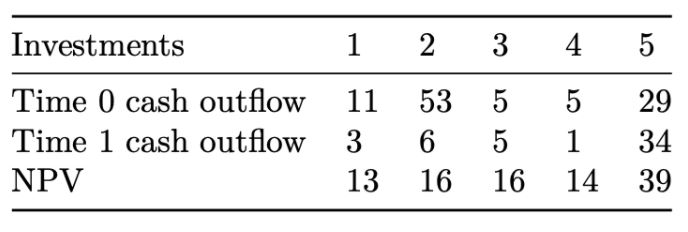

In [90]:
#initializing objective functions and constraints
obj = np.array([13,16,16,14,39]) # maximize profits
A = np.zeros((2,5)) # initialize constraint matrix
A[0,:] = [11,53,5,5,29] # time 0 cash outflow constraint
A[1,:] = [3,6,5,1,34] # time 1 cash outflow constraint

b = np.array([40,20]) # limits on investments at time 0 and 1
sense = np.array(['<','<']) # all constraints are less than or equal constraints

print(A)

[[11. 53.  5.  5. 29.]
 [ 3.  6.  5.  1. 34.]]


In [91]:
#solving with the model
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(5, lb = [0,0,0,0,0], ub = [1,1,1,1,1]) # tell the model how many variables there are

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0 # gurobi stop

ojModel.optimize() # solve the LP
ojModel.objVal # optimal profit level
ojModX.x # how much of each of investments

array([1.        , 0.20085995, 1.        , 1.        , 0.28808354])

## 100% of opportunity 3 should be invested in

# Q4
The goal of this problem is to select a set of foods that will satisfy a set of daily nutritional requirement at minimum cost. Suppose there are three foods available, corn, milk, and bread. There are restrictions on the number of calories (between 2000 and 2250) and the amount of Vitamin A (between 5000 and 50,000) that can be eaten. The table below shows, for each food, the cost per serving, the amount of Vitamin A per serving, and the number of calories per serving. Also, the maximum number of servings for each food is 10.

How many servings of corn should you eat?  Round to 2 decimal places.

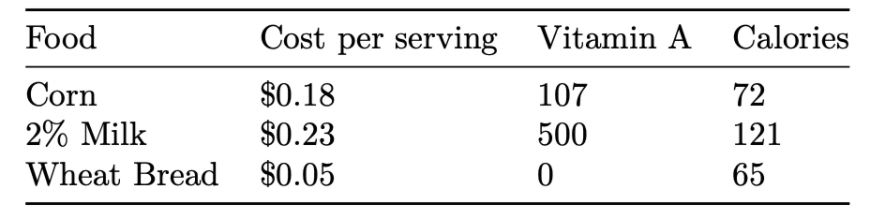

In [115]:
#initializing objective functions and constraints
obj = np.array([0.18,0.23,0.05]) # min costs
A = np.zeros((4,3)) # initialize constraint matrix
A[0,:] = [72,121,65] # calories >= 2000
A[1,:] = [72,121,65] # calories <= 2250
A[2,:] = [107,500,0] # Vit A => 5000
A[3,:] = [107,500,0] # Vit A <=50000

b = np.array([2000,2250, 5000, 50000]) # limits on calories and vit A
sense = np.array(['>','<', '>','<']) # all constraints are less than or equal constraints

print(A)

[[ 72. 121.  65.]
 [ 72. 121.  65.]
 [107. 500.   0.]
 [107. 500.   0.]]


In [102]:
#solving with the model
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(3, lb = [0,0,0], ub = [10,10,10]) # tell the model how many variables there are

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0 # gurobi stop

ojModel.optimize() # solve the LP
ojModel.objVal # optimal servings
ojModX.x # how much servings of each

array([ 1.94444444, 10.        , 10.        ])

## 1.94 servings of corn should be eaten

# Q5
Paper and wood products companies need to define cutting schedules that will maximize the total wood yield of their forests over some planning period. Suppose that a firm with control of 2 forest units wants to identify the best cutting schedule over a planning horizon of 3 years. Forest unit 1 has a total acreage of 2 and unit 2 has a total of 3 acres. The studies that the company has undertaken predict that each acre in unit 1(2) will have 1, 1.3, 1.4 (1, 1.2, 1.6) tons of woods per acre available for harvesting in year 1, 2, 3 respectively. Based on its prediction of economic conditions, the company believes that it should harvest at least 1.2, 1.5, 2 tons of wood in year 1, 2, 3 separately. Due to the availability of equipment and personnel, the company can harvest at most 2, 2, 3 tons of wood in year 1, 2, 3. Find the company’s best cutting strategy that maximizes the total weights of wood. Here discounting of the time value should not be considered.  If some fraction of a forest unit is cut down in year 1, that part of the forest cannot be cut again for the remaining 2 years.  Similarly if some fraction of the forest unit is cut down in year 2 it cannot be cut in year 3.

 

In year 3, how many acres of forest unit 2 should be cut down?  Round to 2 decimal places.

In [113]:
#initializing objective functions and constraints
obj = np.array([1,1.3,1.4,1,1.2,1.6]) # max weights of wood
A = np.zeros((8,6)) # initialize constraint matrix
A[0,:] = [1,1,1,0,0,0] # unit 1 area < 2
A[1,:] = [0,0,0,1,1,1] # unit 2 area < 3
A[2,:] = [1,0,0,1,0,0] # year 1 produce > 1.2 tons
A[3,:] = [1,0,0,1,0,0] # year 1 produce < 2 tons
A[4,:] = [0,1.3,0,0,1.2,0] # year 2 produce > 1.5 tons
A[5,:] = [0,1.3,0,0,1.2,0] # year 2 produce < 2 tons
A[6,:] = [0,0,1.4,0,0,1.6] # year 3 produce > 2 tons
A[7,:] = [0,0,1.4,0,0,1.6] # year 3 produce < 3 tons

b = np.array([2,3, 1.2, 2,1.5,2,2,3]) # weight of woods that can be harvested and area of forest as constraints
sense = np.array(['<','<', '>','<', '>','<', '>','<']) # all constraints are less than or equal constraints

print(A)

[[1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  1. ]
 [1.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  1.  0.  0. ]
 [0.  1.3 0.  0.  1.2 0. ]
 [0.  1.3 0.  0.  1.2 0. ]
 [0.  0.  1.4 0.  0.  1.6]
 [0.  0.  1.4 0.  0.  1.6]]


In [114]:
#solving with the model
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(6, lb = [0,0,0,0,0,0]) # tell the model how many variables there are

ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0 # gurobi stop

ojModel.optimize() # solve the LP
ojModel.objVal # optimal area each year
ojModX.x # how much area harvested of each forest each year

array([0.46153846, 1.53846154, 0.        , 1.125     , 0.        ,
       1.875     ])

## 1.88 acres of unit 2 forest in year 3 should be cut down